# Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
Company = pd.read_excel("Company_Data2015-1 (1).xlsx")

In [4]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',


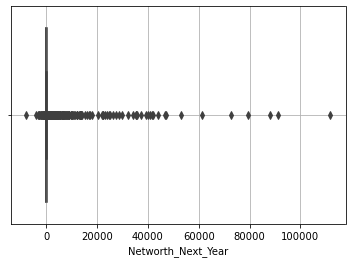

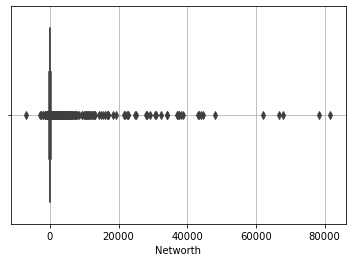

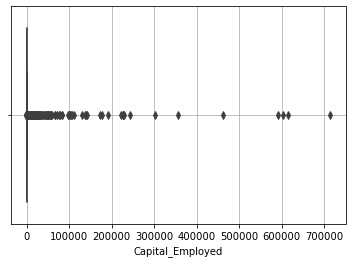

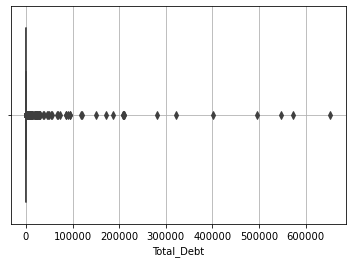

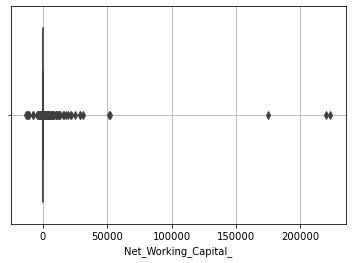

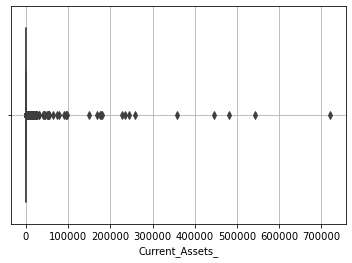

In [6]:
cols = ['Networth_Next_Year','Networth','Capital_Employed','Total_Debt','Net_Working_Capital_','Current_Assets_']

for i in cols:
    sns.boxplot(Company[i])
    plt.grid()
    plt.show()

In [7]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [9]:
Company.duplicated().sum()

0

In [10]:
Company.size

240262

In [11]:
Company.isnull().sum().sum()

118

In [12]:
Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [13]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [14]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [15]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [16]:
Company[['default','Networth_Next_Year']].head(20)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [17]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [18]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [19]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',


In [20]:
Company.isnull().sum().sum()

118

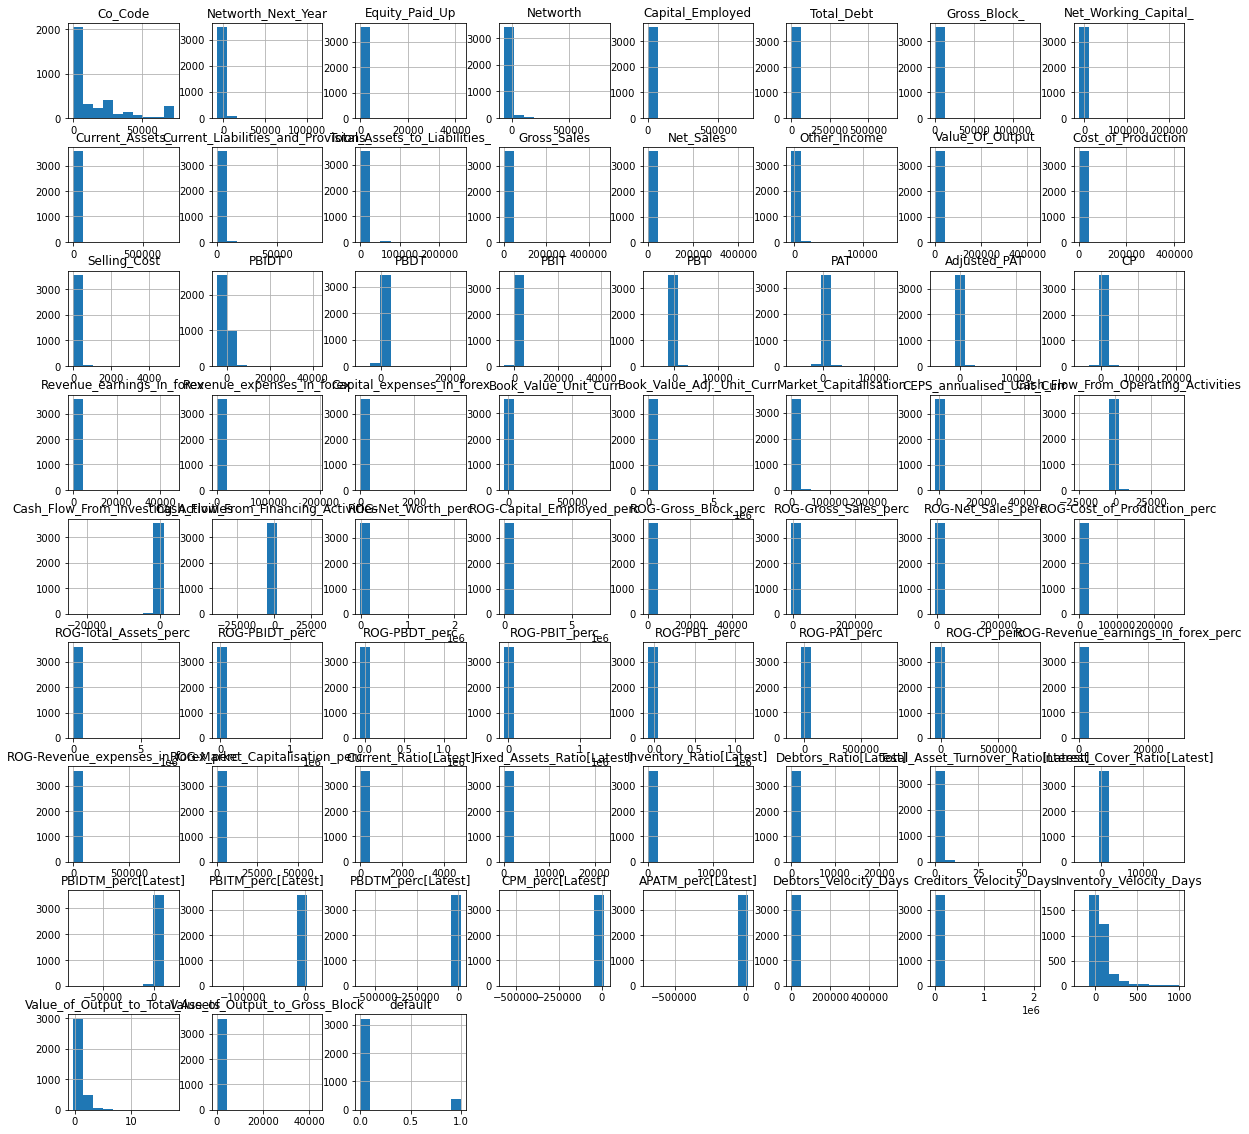

In [21]:
Company.hist(figsize=(20,20))
plt.show()

In [22]:
Company = Company.drop(['Fixed_Assets_Ratio[Latest]','Inventory_Ratio[Latest]','Debtors_Ratio[Latest]','Total_Asset_Turnover_Ratio[Latest]','Interest_Cover_Ratio[Latest]'], axis = 1)
#                3586 non-null   float64
# 52             3586 non-null   float64
 #53               3586 non-null   float64
 #54                 3586 non-null   float64
 #55     3586 non-null   float64
 #56  

In [23]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [24]:
Company_X

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [25]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [26]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM_perc[Latest]                 933
Adjusted_PAT                       954
Book_Value_Adj._Unit_Curr          486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 62, dtype: int64

In [27]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [28]:
Company_X.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 62, dtype: int64

In [29]:
Company_X.isnull().sum().sum()

40268

In [30]:
Company_X.shape

(3586, 62)

In [31]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

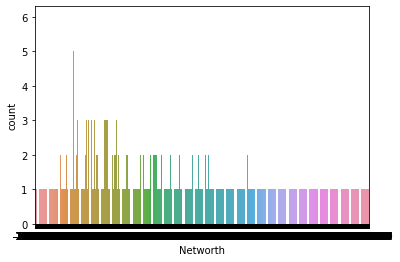

In [32]:
sns.countplot(Company['Networth'])
plt.show()

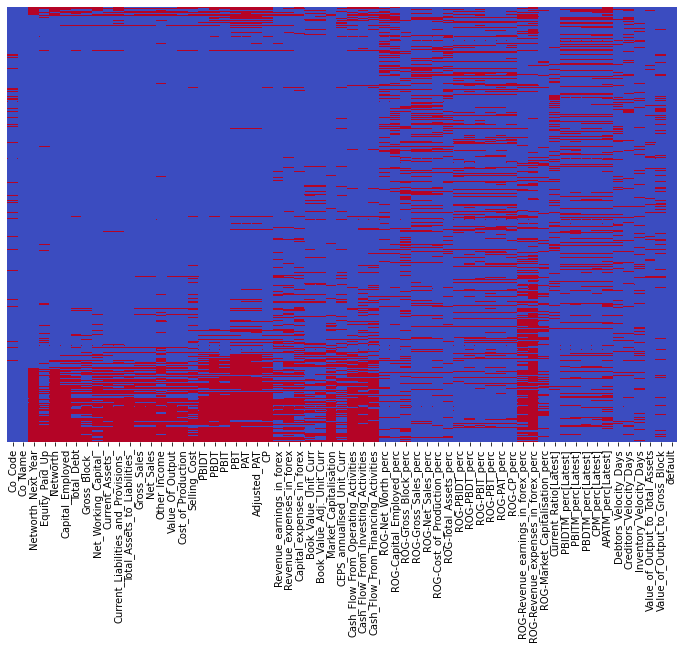

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [34]:
Company_sub1.isnull().sum(axis = 1)

0       20
1       34
2       44
3       36
4       36
        ..
3581    31
3582    36
3583    34
3584    31
3585    36
Length: 3586, dtype: int64

In [35]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [36]:
for feature in Company.columns: 
    if Company[feature].dtype == 'object':
        Company[feature] = pd.Categorical(Company[feature]).codes 

In [37]:
Company_sub1_temp.shape

(1324, 63)

In [38]:
Company_sub1_temp['default'].value_counts()

0    1192
1     132
Name: default, dtype: int64

In [39]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [40]:
118/388

0.30412371134020616

In [41]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Inventory_Velocity_Days               0.10
Co_Code                               0.08
Value_of_Output_to_Total_Assets       0.04
Co_Name                               0.00
default                               0.00
Length: 63, dtype: float64

In [42]:
Company_sub2 = Company_sub1.drop(['Co_Name','ROG-Revenue_expenses_in_forex_perc', 'ROG-Revenue_earnings_in_forex_perc'],
                           axis = 1)

In [43]:
Company_sub2.shape

(3586, 60)

In [44]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

In [45]:
for column in Company.columns:
    if Company[column].dtype != 'object':
        mean = Company[column].mean()
        Company[column] = Company[column].fillna(mean)    
        
Company.isnull().sum() 

Co_Code                            0
Co_Name                            0
Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
default                            0
Length: 63, dtype: int64

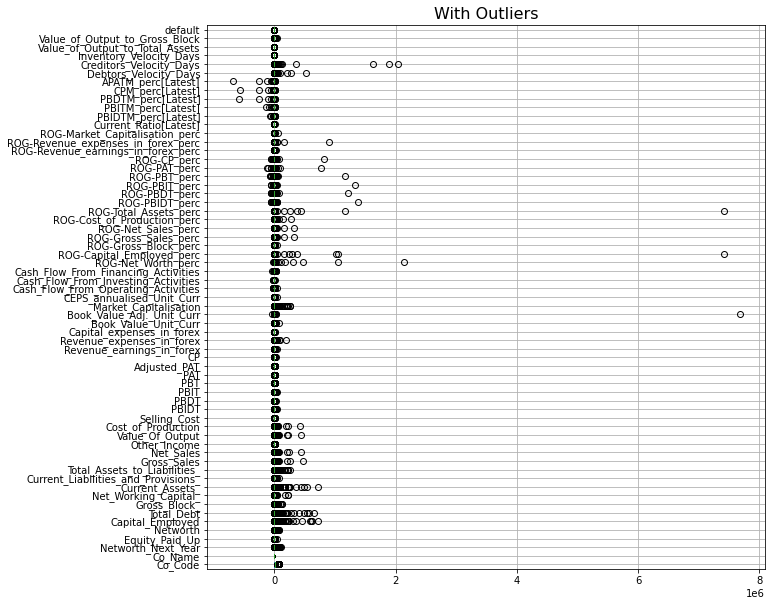

In [46]:
cont=Company.dtypes[(Company.dtypes!='object')].index
plt.figure(figsize=(10,10))
Company[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [48]:
for column in Company[cont].columns:
    lr,ur=remove_outlier(Company[column])
    Company[column]=np.where(Company[column]>ur,ur,Company[column])
    Company[column]=np.where(Company[column]<lr,lr,Company[column])

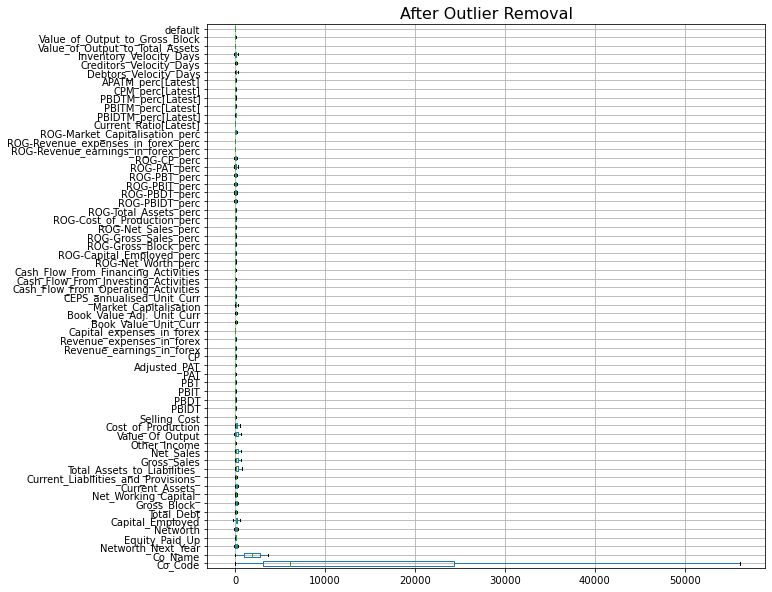

In [49]:
plt.figure(figsize=(10,10))
Company[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [50]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   float64
 1   Co_Name                              3586 non-null   float64
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [51]:
Company["Co_Name"] = Company["Co_Name"].astype('float')


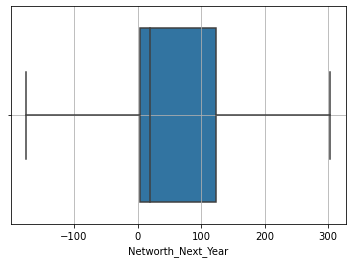

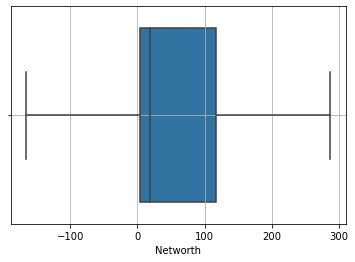

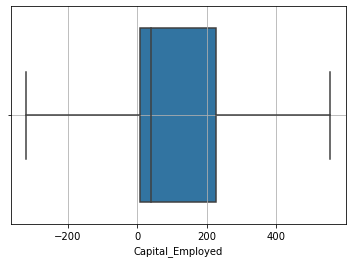

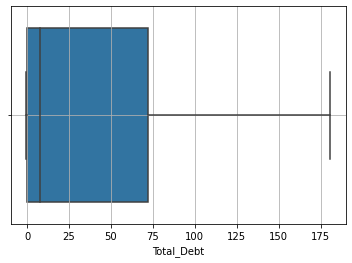

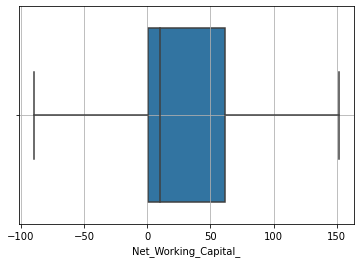

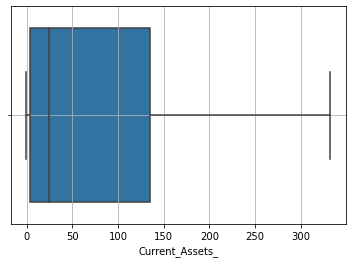

In [52]:
cols = ['Networth_Next_Year','Networth','Capital_Employed','Total_Debt','Net_Working_Capital_','Current_Assets_']

for i in cols:
    sns.boxplot(Company[i])
    plt.grid()
    plt.show()

<AxesSubplot:>

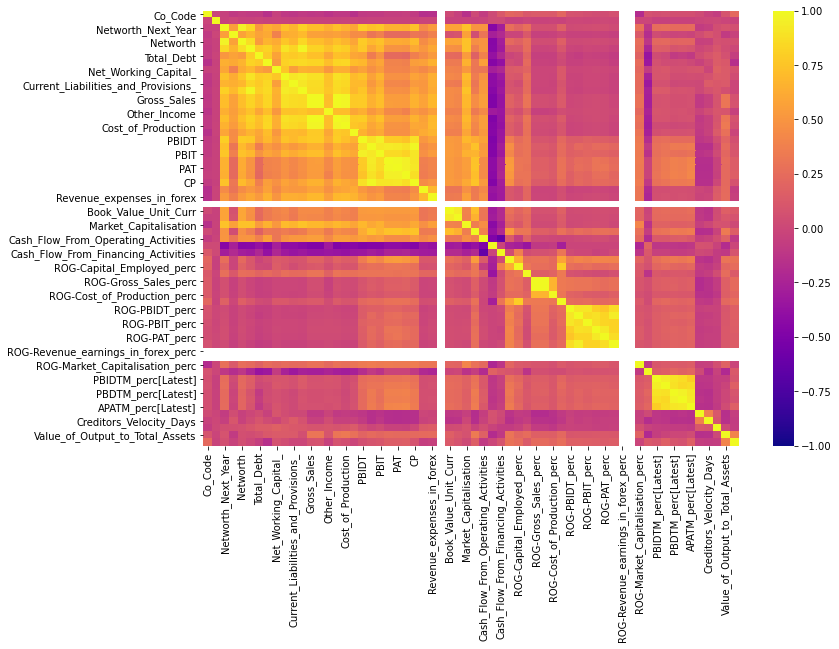

In [53]:
plt.figure(figsize = (12,8))
cor_matrix = Company.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [54]:
predictors = Company.drop('default', axis=1)
response = Company['default']

In [55]:
Company_dummy = pd.get_dummies(Company, drop_first = True)
Company_dummy.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,16974.00,1226.00,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,...,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00,0.00
1,21214.00,3214.00,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,...,-21.43,-21.15,-17.08,-11.11,29.00,101.00,2.00,0.31,0.24,0.00
2,14852.00,21.00,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,...,-21.43,-21.15,-17.08,-11.11,97.00,210.50,0.00,-0.03,-0.26,0.00
3,2439.00,1001.00,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,...,-7.21,-21.15,-17.08,-11.11,93.00,63.00,2.00,0.24,1.90,0.00
4,23505.00,452.00,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,...,-21.43,-21.15,28.47,18.52,253.00,210.50,0.00,0.01,0.05,0.00


In [56]:
import statsmodels.formula.api as SM

In [57]:
X = Company_dummy.drop(['default'], axis=1)
y = Company_dummy['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 33,random_state=42,stratify = Company_dummy['default'])

In [58]:
X_train.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
1611,56129.88,2893.00,13.99,1.10,12.90,13.04,0.06,8.43,8.28,10.49,...,22.71,19.94,22.51,15.91,13.14,72.00,27.00,111.00,1.10,2.30
3375,3546.00,3408.00,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,...,23.87,22.02,22.60,15.09,13.24,132.00,38.00,24.00,1.98,7.51
2459,7429.00,2160.00,72.91,19.70,71.42,78.40,6.98,0.73,52.59,78.71,...,7.90,7.67,7.82,6.52,6.29,180.00,183.00,4.00,0.37,11.87
1679,1698.00,1652.00,15.61,7.44,14.27,14.27,0.00,13.87,1.47,2.29,...,47.47,35.71,35.25,28.47,18.52,43.00,0.00,137.00,0.19,0.62
1148,3634.00,3283.00,6.40,3.00,7.93,8.06,0.00,8.90,3.59,5.10,...,-28.48,-21.43,-21.15,-17.08,-11.11,113.00,50.00,102.00,0.29,0.29


In [59]:
X_train.shape

(3553, 62)

In [60]:
X_test.shape

(33, 62)

In [61]:
Default_train = pd.concat([X_train, y_train], axis=1)
Default_test = pd.concat([X_test, y_test], axis=1)

In [62]:
Default_train.default.sum()/len(Default_train.default)

0.0

In [ ]:
model_1 = SM.logit(formula = 'default ~ Networth_Next_Year', data=Company_dummy).fit()

In [ ]:
model_1.summary()

In [ ]:
model_2 = SM.logit(formula = 'default ~ Networth_Next_Year + Gross_Block_', data=Default_test).fit()

In [ ]:
model_2.summary()

In [ ]:
y_prob_pred_train = model_2.predict(default_train)
y_prob_pred_train

In [ ]:
y_class_pred = []
for i in range(0,len(y_prob_pred_train))
    if np.array(y_prob_pred_train)[i]>0.5
        a=1
    else:
        a=0
    y_class_pred.append(a)  

In [ ]:
from sklearn import metrics 

In [ ]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred),annot=True, fmt='d',cbar=False, cmap='Blues'))


plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(metrics.classification_report(Default_train.train_labels,ytrain_predict))

In [ ]:
y_prob_pred_train = model_2.predict(default_train)
y_prob_pred_train